In [145]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from datetime import datetime, date
from dateutil.relativedelta import relativedelta

%matplotlib inline

In [146]:
data="/home/richard/Downloads/New Wave/mali/House_Rent_Dataset.csv"

In [147]:
dataFrame = pd.read_csv(data)

In [148]:
#describe data
dataFrame

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,2022-05-15,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,2022-07-10,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,2022-07-06,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


In [149]:
dataFrame.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [150]:
#data validation and sanitization

dataFrame.columns = dataFrame.columns.str.lower().str.replace(' ', '_')
dataFrame.columns

Index(['posted_on', 'bhk', 'rent', 'size', 'floor', 'area_type',
       'area_locality', 'city', 'furnishing_status', 'tenant_preferred',
       'bathroom', 'point_of_contact'],
      dtype='object')

In [151]:
#understand the data better

dataFrame.dtypes

posted_on            object
bhk                   int64
rent                  int64
size                  int64
floor                object
area_type            object
area_locality        object
city                 object
furnishing_status    object
tenant_preferred     object
bathroom              int64
point_of_contact     object
dtype: object

In [152]:
dataFrame.head(10)

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


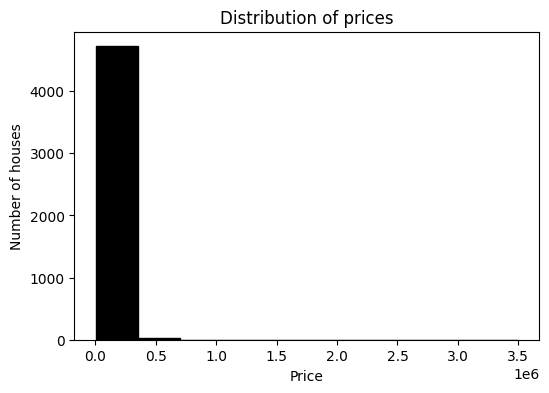

In [153]:
#EDA
plt.figure(figsize=(6,4))

# sns.histplot(df.rent, bins=70)
sns.histplot(dataFrame.rent, bins=10, color='black', alpha=1)
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.title('Distribution of prices')
plt.show()

In [154]:
dataFrame['rent'].max()

np.int64(3500000)

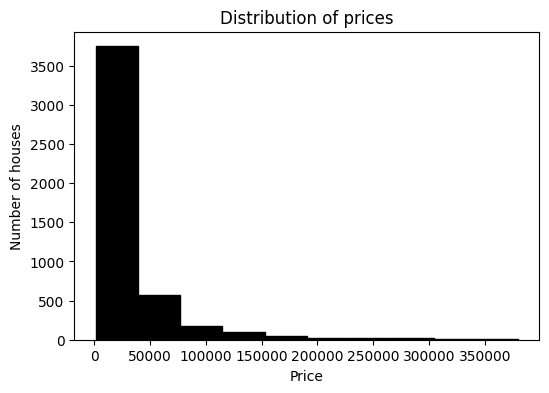

In [155]:

plt.figure(figsize=(6,4))

# sns.histplot(df.rent, bins=70)
sns.histplot(dataFrame.rent[dataFrame.rent < 400000], bins=10, color='black', alpha=1)
plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.title('Distribution of prices')
plt.show()

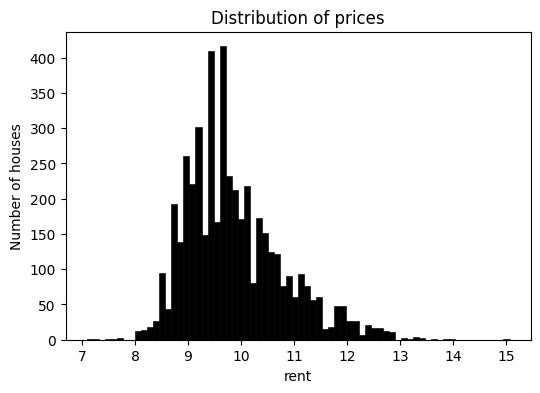

In [156]:
plt.figure(figsize=(6,4))

sns.histplot(np.log1p(dataFrame['rent']), bins=70, color='black', alpha=1)
# plt.xlabel('Price')
plt.ylabel('Number of houses')
plt.title('Distribution of prices')
plt.show()

In [157]:
#start data cleaning by filling the empty/null values
dataFrame.isnull().sum()


posted_on            0
bhk                  0
rent                 0
size                 0
floor                0
area_type            0
area_locality        0
city                 0
furnishing_status    0
tenant_preferred     0
bathroom             0
point_of_contact     0
dtype: int64

In [158]:
#validation framework

#make randomization static
np.random.seed(2)

#get length of data
n = len(dataFrame) 

#set a 60 20 20 rule. 60 for training. 20 for testingg, 20 for validation
numberOfTestData =  int(n*.2)
numberOfValidationData = int(n*.2)
numberOfTrainingData = n -(numberOfTestData+numberOfValidationData)

#shuffle the data
arrayedDataFrame = np.arange(n)
np.random.shuffle(arrayedDataFrame)
shuffledDataFrame = dataFrame.iloc[arrayedDataFrame]

#slice data frame using rule
testData = shuffledDataFrame.iloc[:numberOfTestData].copy()
validationData = shuffledDataFrame.iloc[numberOfTestData:numberOfTestData+numberOfValidationData].copy()
trainingData = shuffledDataFrame.iloc[numberOfTestData+numberOfValidationData:].copy()
testData

,posted_on,bhk,rent,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
4014,2022-05-25,2,9500,1290,1 out of 2,Super Area,"Jillelguda, Medbowli",Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4709,2022-05-20,1,6000,400,1 out of 3,Super Area,Nagaram,Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner
1649,2022-06-05,2,17500,1080,1 out of 4,Super Area,Electronic City,Bangalore,Furnished,Bachelors/Family,2,Contact Owner
2648,2022-05-05,2,10000,55,2 out of 4,Super Area,Dwarka Sector 8,Delhi,Unfurnished,Bachelors/Family,2,Contact Owner
2717,2022-07-04,2,16500,90,4 out of 5,Super Area,DS 19,Delhi,Semi-Furnished,Bachelors/Family,2,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
238,2022-05-06,1,5500,1800,Ground out of 2,Super Area,Baranagar,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
3908,2022-05-28,3,35000,1650,5 out of 5,Carpet Area,Kondapur,Hyderabad,Semi-Furnished,Family,3,Contact Owner
3550,2022-06-19,1,10000,550,Ground out of 4,Super Area,Ambattur,Chennai,Unfurnished,Bachelors/Family,1,Contact Owner
2540,2022-07-04,1,16000,500,1 out of 4,Super Area,Laxmi Nagar,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [159]:
#prepare for training to predict the price

originalTrainingValues = trainingData.rent.values
originalTestingValues = testData.rent.values
originalValidationValues = validationData.rent.values


yTrain = np.log1p(trainingData.rent.values)
yTest = np.log1p(testData.rent.values)
yValidate = np.log1p(validationData.rent.values)

#drop columns we want to predit

del trainingData['rent']
del testData['rent']
del validationData['rent']



#log of those values


In [160]:
#Get the linear regression formular
def linearRegressionWithRegularizationParameter(featureMatrix, predictedValues, r=0.0):
 #calculate and add the bias term
 ones =  np.ones(featureMatrix.shape[0])
 featureMatrix = np.column_stack([ones, featureMatrix])
 
 #calculate weight and bias terms   
 matrixDotTranpose = featureMatrix.T.dot(featureMatrix)
 regularisationParameter = r * np.eye(matrixDotTranpose.shape[0])
 matrixDotTranpose = matrixDotTranpose + regularisationParameter
 inverseOfMatrixDotTranspose = np.linalg.inv(matrixDotTranpose)
 weights  = inverseOfMatrixDotTranspose.dot(featureMatrix.T).dot(predictedValues)
 
 return weights[0], weights[1:]
    

In [161]:
#baseline model is to use all the numerical columns

trainingData.dtypes

posted_on            object
bhk                   int64
size                  int64
floor                object
area_type            object
area_locality        object
city                 object
furnishing_status    object
tenant_preferred     object
bathroom              int64
point_of_contact     object
dtype: object

In [162]:
base = ['bhk','size','bathroom']

In [163]:
def prepareFeatureMatrix(featureMatrix):
    #remove 0's and nulls
    numberBasedFeatures = featureMatrix[base]
    featureMatrix  = numberBasedFeatures.fillna(0)
    preparedFeatureMatrix = featureMatrix.values
    
    return preparedFeatureMatrix

In [164]:
preparedTrainingData = prepareFeatureMatrix(trainingData)
weight, bias = linearRegressionWithRegularizationParameter(preparedTrainingData,yTrain)
weight, bias
# bias

(np.float64(8.37807140381755),
 array([1.26206568e-01, 1.44408350e-04, 5.59442694e-01]))

In [165]:
yPrediction = weight + preparedTrainingData.dot(bias)
yPrediction

array([ 9.88410292,  9.069497  ,  9.86345252, ...,  9.90821911,
       10.03543654,  9.33433558])

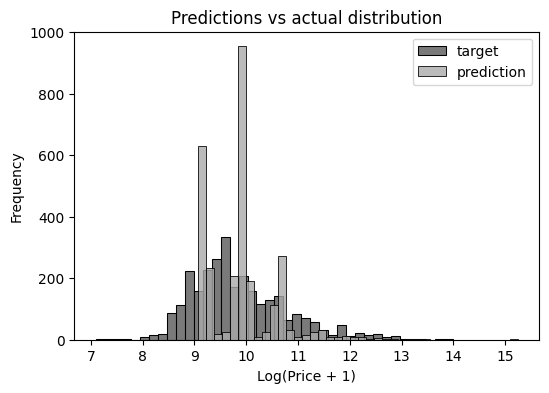

In [166]:
plt.figure(figsize=(6, 4))

sns.histplot(yTrain, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(yPrediction, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)


plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [167]:
def rmse(y, y_pred):
    error = y_pred -y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [168]:
rmse(yTrain,yPrediction)

np.float64(0.6678727949111832)

In [169]:
X_val = prepareFeatureMatrix(validationData)
yPrediction = weight + X_val.dot(bias)

In [170]:
rmse(yValidate,yPrediction)

np.float64(0.6825747192528785)

In [171]:
#Feature engineering. lowering rmse
#we can see the duration with the date, 



    # features = base.copy()
    # currentYear = date.today()
    # mothnsOnDisplay = dateDifference.years * 12 + dateDifference.months
    # dataFrame['months_on_display'] = mothnsOnDisplay
    # features = features.append('months_on_display')
    
    # numberBasedFeatures = dataFrame[features]
    # dataFrame  = numberBasedFeatures.fillna(0)
    
    # preparedFeatureMatrix = dataFrame.values
    # return preparedFeatureMatrix


def prepareFeatureMatrix(dataFrame):
    #remove 0's and nulls
    
    dataFrame = dataFrame.copy()
    dataFrame = dataFrame.reset_index(drop=True)
    numberBasedFeatures = base.copy()
    numberBasedFeatures.append('months_on_display')
    # numberBasedFeatures = dataFrame[base]
    # dataFrame  = numberBasedFeatures.fillna(0)
    dataFrame['months_on_display'] = {}
    
    
    # check if the age makes an effect on the rmse
    #add age of rent item
    for index in range(len(dataFrame)):
        dateDifference= relativedelta(date.today(), datetime.strptime(dataFrame.loc[index, 'posted_on'], "%Y-%m-%d"))
        monthsOnDisplay = dateDifference.years * 12 + dateDifference.months
        dataFrame.loc[index, 'months_on_display'] =  monthsOnDisplay
    
    
    dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
    dataFrame = dataFrame[numberBasedFeatures]
    preparedFeatureMatrix = dataFrame.values
    
    return preparedFeatureMatrix
    



In [172]:
# dataFrame = pd.DataFrame({
#     'A': [1, 2, 3],
#     'B': [4, 5, 6],
#     'C': [7, 8, 9],
#     'D': [8, 9, None]
# })

# dataFrame['E'] = {}

# for index in range(len(dataFrame)):
#     dataFrame.loc[index, 'E'] = date.today()
# dataFrame['D'] = dataFrame['D'].fillna(date.today())

# dataFrame


In [173]:
X_train = prepareFeatureMatrix(trainingData)
weight, bias = linearRegressionWithRegularizationParameter(X_train,yTrain)

# weight, bias

yPrediction = weight + X_train.dot(bias)
yPrediction


print("This is the rmse for training data", rmse(yTrain,yPrediction))


X_validate = prepareFeatureMatrix(validationData)
weight, bias = linearRegressionWithRegularizationParameter(X_validate,yValidate)

# weight, bias

yPrediction = weight + X_validate.dot(bias)
yPrediction

print("This is the validation for validation data", rmse(yValidate,yPrediction))



/tmp/ipykernel_55409/3055231650.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())


This is the rmse for training data 0.6630904476863906
This is the validation for validation data 0.6676277285799693


/tmp/ipykernel_55409/3055231650.py:39: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())


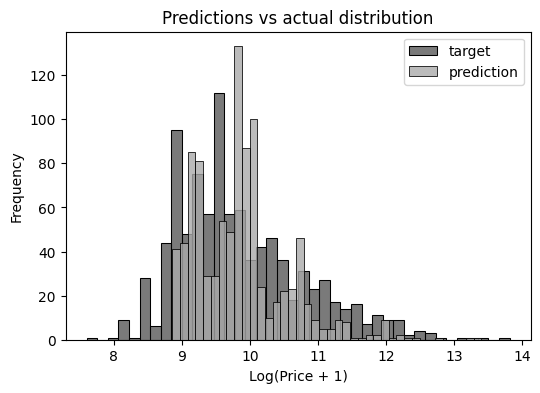

In [174]:

plt.figure(figsize=(6, 4))

sns.histplot(yValidate, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(yPrediction, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)


plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [175]:
# df['floor'].unique()
# dataFrame['floor'].value_counts()
# dataFrame['number_of_floors'] = {}
# dataFrame['apartment_floor_number'] = {}

# splitFloorDetails = dataFrame['floor'].str.replace(' out of ', ' ')
# dataFrame[['apartment_floor_number', 'number_of_floors']] = splitFloorDetails.str.rsplit(' ', n=1, expand=True)
# dataFrame['apartment_floor_number'] = dataFrame['apartment_floor_number'].replace({'Ground': '0', 'Upper Basement': '0','Lower Basement':'0'})


# df['apartment_floor_number'].value_counts()
# Filter out rows where the entire value can be converted to numeric
# df['Non_Numeric'] = pd.to_numeric(df['apartment_floor_number'], errors='coerce').isna()
# non_numeric_df = df[df['Non_Numeric']]

# non_numeric_df[['apartment_floor_number']].value_counts()



# for index in range(len(df['floor'])):
#     floorDetails  = df.loc[index, 'floor'].split()
#     if(len(floorDetails)) == 0:
#         numberOfFloors = 0
#         apartmentFloorNumber = 0
#     else:
#         numberOfFloors = floorDetails[0]
#         apartmentFloorNumber = floorDetails[-1]
#         df.loc[index, 'number_of_floors'] =  numberOfFloors
#         df.loc[index, 'apartment_floor_number'] =  apartmentFloorNumber
        
# df = pd.DataFrame(array)

# Save the DataFrame to a CSV file
# df['apartment_floor_number'] = df['apartment_floor_number'].replace('Ground','1')
# dataFrame.to_csv('floors_output.csv', index=False)

In [176]:

def prepareFeatureMatrix(dataFrame):
    #remove 0's and nulls
    
    dataFrame = dataFrame.copy()
    dataFrame = dataFrame.reset_index(drop=True)
    numberBasedFeatures = base.copy()
    numberBasedFeatures.append('months_on_display')
    numberBasedFeatures.append('number_of_floors')
    numberBasedFeatures.append('apartment_floor_number')
    # numberBasedFeatures = dataFrame[base]
    # dataFrame  = numberBasedFeatures.fillna(0)
    dataFrame['months_on_display'] = {}
    dataFrame['number_of_floors'] = {}
    dataFrame['apartment_floor_number'] = {}
    
    
    # check if the age makes an effect on the rmse
    #add age of rent item
    for index in range(len(dataFrame)):
        dateDifference= relativedelta(date.today(), datetime.strptime(dataFrame.loc[index, 'posted_on'], "%Y-%m-%d"))
        monthsOnDisplay = dateDifference.years * 12 + dateDifference.months
        dataFrame.loc[index, 'months_on_display'] =  monthsOnDisplay
    
    
    dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
    
    #separate the floor level of the into sepearate columns to be added as the feature matrix
    splitFloorDetails = dataFrame['floor'].str.replace(' out of ', ' ')
    dataFrame[['apartment_floor_number', 'number_of_floors']] = splitFloorDetails.str.rsplit(' ', n=1, expand=True)
    #todo improve the line below to handle the floor number much better
    dataFrame['apartment_floor_number'] = dataFrame['apartment_floor_number'].replace({'Ground': '0', 'Upper Basement': '0','Lower Basement':'0'})
   
   
    #convert the newly created columns to an integer
    dataFrame['number_of_floors'] = dataFrame['number_of_floors'].fillna(0)
    dataFrame['apartment_floor_number'] = dataFrame['apartment_floor_number'].fillna(0)
    dataFrame['apartment_floor_number']  = dataFrame['apartment_floor_number'].astype(int)
    dataFrame['number_of_floors']  = dataFrame['number_of_floors'].astype(int)
    
    dataFrame = dataFrame[numberBasedFeatures]
    preparedFeatureMatrix = dataFrame.values
    
    return preparedFeatureMatrix
    



In [177]:

dataFrame.to_csv('floors_output.csv', index=False)

In [178]:

X_train = prepareFeatureMatrix(trainingData)
weight, bias = linearRegressionWithRegularizationParameter(X_train,yTrain)

# weight, bias

yPrediction = weight + X_train.dot(bias)
yPrediction


print("This is the rmse for training data", rmse(yTrain,yPrediction))


X_validate = prepareFeatureMatrix(validationData)
weight, bias = linearRegressionWithRegularizationParameter(X_validate,yValidate)

# weight, bias

yPrediction = weight + X_validate.dot(bias)
yPrediction

print("This is the validation for validation data", rmse(yValidate,yPrediction))

/tmp/ipykernel_55409/3948849523.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())


This is the rmse for training data 0.5809085444908201
This is the validation for validation data 0.5947789138915416


/tmp/ipykernel_55409/3948849523.py:25: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())


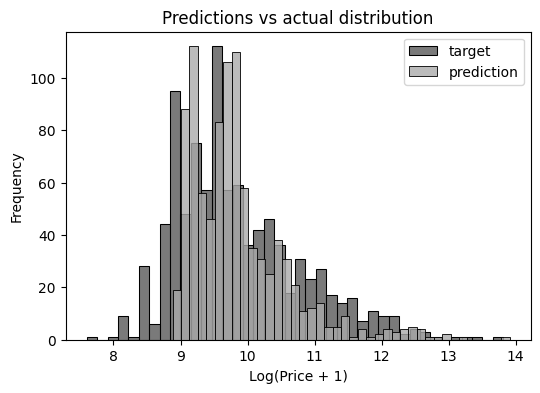

In [179]:

plt.figure(figsize=(6, 4))

sns.histplot(yValidate, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(yPrediction, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)


plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [180]:
dataFrame['area_type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [181]:

def prepareFeatureMatrix(dataFrame):
    dataFrame = dataFrame.copy()
    dataFrame = dataFrame.reset_index(drop=True)
    numberBasedFeatures = base.copy()
    numberBasedFeatures.append('number_of_floors')
    numberBasedFeatures = base.copy()
    numberBasedFeatures.append('months_on_display')
    numberBasedFeatures.append('apartment_floor_number')
    numberBasedFeatures.append('super_area')
    numberBasedFeatures.append('carpet_area')
    numberBasedFeatures.append('built_area')

    # numberBasedFeatures = dataFrame[base]
        # dataFrame  = numberBasedFeatures.fillna(0)
    dataFrame['months_on_display'] = {}
    dataFrame['number_of_floors'] = {}
    dataFrame['apartment_floor_number'] = {}


    #feature engineer for area
    dataFrame['super_area'] = {}
    dataFrame['carpet_area'] = {}
    dataFrame['built_area'] = {}
        
        
    for index in range(len(dataFrame)):
        # check if the age makes an effect on the rmse
        #add age of rent item
        dateDifference= relativedelta(date.today(), datetime.strptime(dataFrame.loc[index, 'posted_on'], "%Y-%m-%d"))
        monthsOnDisplay = dateDifference.years * 12 + dateDifference.months
        dataFrame.loc[index, 'months_on_display'] =  monthsOnDisplay
        
        

        
    dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())



        #separate the floor level of the into sepearate columns to be added as the feature matrix
    splitFloorDetails = dataFrame['floor'].str.replace(' out of ', ' ')
    dataFrame[['apartment_floor_number', 'number_of_floors']] = splitFloorDetails.str.rsplit(' ', n=1, expand=True)
        #todo improve the line below to handle the floor number much better
    dataFrame['apartment_floor_number'] = dataFrame['apartment_floor_number'].replace({'Ground': '0', 'Upper Basement': '0','Lower Basement':'0'})
    
    dataFrame['number_of_floors'].to_csv('floors_output.csv', index=False)
    
        #convert the newly created columns to an integer
    dataFrame['number_of_floors'] = dataFrame['number_of_floors'].fillna(0)
    dataFrame['apartment_floor_number'] = dataFrame['apartment_floor_number'].fillna(0)
    dataFrame['apartment_floor_number']  = dataFrame['apartment_floor_number'].astype(int)
    dataFrame['number_of_floors']  = dataFrame['number_of_floors'].astype(int)

        #check feature engineering for areas
    dataFrame.loc[dataFrame['area_type'] == "Super Area", 'super_area'] = 1
    dataFrame.loc[dataFrame['area_type'] == "Carpet Area", 'carpet_area'] = 1
    dataFrame.loc[dataFrame['area_type'] == "Built Area", 'built_area'] = 1

    dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
    dataFrame['carpet_area'] = dataFrame['carpet_area'].fillna(0)
    dataFrame['built_area'] = dataFrame['built_area'].fillna(0)

    
    dataFrame = dataFrame[numberBasedFeatures]
    preparedFeatureMatrix = dataFrame.values
    
    return preparedFeatureMatrix
    

In [182]:

X_train = prepareFeatureMatrix(trainingData)
weight, bias = linearRegressionWithRegularizationParameter(X_train,yTrain,.01)

# weight, bias

yPrediction = weight + X_train.dot(bias)
yPrediction


print("This is the rmse for training data after including the area type", rmse(yTrain,yPrediction))


X_validate = prepareFeatureMatrix(validationData)
weight, bias = linearRegressionWithRegularizationParameter(X_validate,yValidate,.01)

# weight, bias

yPrediction = weight + X_validate.dot(bias)
yPrediction

print("This is the validation for validation data after including the area type", rmse(yValidate,yPrediction))


/tmp/ipykernel_55409/1148178809.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
/tmp/ipykernel_55409/1148178809.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
/tmp/ipykernel_55409/1148178809.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

This is the rmse for training data after including the area type 0.573970554187543
This is the validation for validation data after including the area type 0.5764198326001514


/tmp/ipykernel_55409/1148178809.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
/tmp/ipykernel_55409/1148178809.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
/tmp/ipykernel_55409/1148178809.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

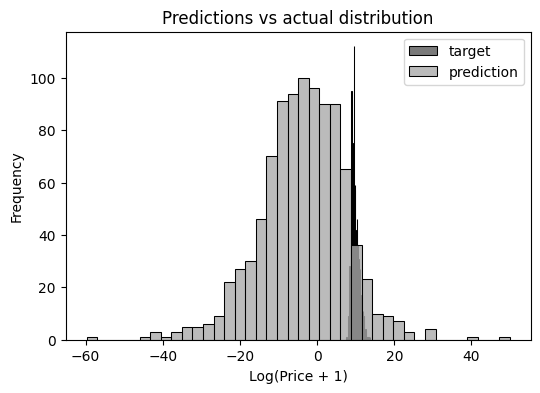

In [116]:

plt.figure(figsize=(6, 4))

sns.histplot(yValidate, label='target', color='#222222', alpha=0.6, bins=40)
sns.histplot(yPrediction, label='prediction', color='#aaaaaa', alpha=0.8, bins=40)


plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [129]:
X_train = prepareFeatureMatrix(trainingData)
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    weight, bias = linearRegressionWithRegularizationParameter(X_train,yTrain,r)
    yPrediction = weight + X_train.dot(bias)
    print("This is the rmse for training data after including the area type", rmse(yTrain,yPrediction))
    print("This is the r value ", r)


X_validate = prepareFeatureMatrix(validationData)
for r in [0, 0.001, 0.01, 0.1, 1, 10]:
    weight, bias = linearRegressionWithRegularizationParameter(X_validate,yValidate,r)
    yPrediction = weight + X_validate.dot(bias)
    print("This is the validation for validation data after including the area type", rmse(yValidate,yPrediction))
    print("This is the r value ", r)



/tmp/ipykernel_55409/1148178809.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
/tmp/ipykernel_55409/1148178809.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
/tmp/ipykernel_55409/1148178809.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

This is the rmse for training data after including the area type 402.1475209431361
This is the r value  0
This is the rmse for training data after including the area type 0.5739697331928247
This is the r value  0.001
This is the rmse for training data after including the area type 0.573970554187543
This is the r value  0.01
This is the rmse for training data after including the area type 0.574045296353102
This is the r value  0.1
This is the rmse for training data after including the area type 0.5777827266986044
This is the r value  1
This is the rmse for training data after including the area type 0.6053872071231101
This is the r value  10
This is the validation for validation data after including the area type 17.668827851705647
This is the r value  0
This is the validation for validation data after including the area type 0.5764104984860746
This is the r value  0.001
This is the validation for validation data after including the area type 0.5764198326001514
This is the r value  0.01

/tmp/ipykernel_55409/1148178809.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
/tmp/ipykernel_55409/1148178809.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
/tmp/ipykernel_55409/1148178809.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

In [135]:
dataFrameFullTrain = pd.concat([trainingData,validationData])
dataFrameFullTrain = dataFrameFullTrain.reset_index(drop=True)
dataFrameFullTrain

,posted_on,bhk,size,floor,area_type,area_locality,city,furnishing_status,tenant_preferred,bathroom,point_of_contact
0,2022-06-30,2,933,2 out of 5,Super Area,Kompally,Hyderabad,Unfurnished,Bachelors,2,Contact Owner
1,2022-06-30,1,40,3 out of 3,Carpet Area,Shalimar bagh,Delhi,Furnished,Bachelors/Family,1,Contact Agent
2,2022-06-23,2,790,2 out of 2,Carpet Area,Kovilancheri,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner
3,2022-06-04,1,400,3 out of 4,Carpet Area,Lajpat Nagar 4,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Agent
4,2022-06-04,4,2600,Upper Basement out of 20,Carpet Area,Lokhandwala Complex,Mumbai,Unfurnished,Family,4,Contact Agent
...,...,...,...,...,...,...,...,...,...,...,...
3792,2022-06-12,2,1100,2 out of 5,Carpet Area,"Murugeshpalya, Airport Road",Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner
3793,2022-06-10,1,400,1 out of 1,Super Area,"Vivek Nagar, Garfa",Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
3794,2022-06-26,3,2000,1 out of 1,Carpet Area,Kapra,Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
3795,2022-06-02,2,717,1 out of 3,Super Area,Sholinganallur,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner


In [142]:
XFullTrain = prepareFeatureMatrix(dataFrameFullTrain)
XFullTrain

/tmp/ipykernel_55409/1148178809.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
/tmp/ipykernel_55409/1148178809.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
/tmp/ipykernel_55409/1148178809.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

array([[   2,  933,    2, ...,    1,    0,    0],
       [   1,   40,    1, ...,    0,    1,    0],
       [   2,  790,    2, ...,    0,    1,    0],
       ...,
       [   3, 2000,    3, ...,    0,    1,    0],
       [   2,  717,    2, ...,    1,    0,    0],
       [   2, 1000,    2, ...,    0,    1,    0]])

In [184]:
yFullTrain = np.concatenate([yTrain,yValidate])

In [187]:
weight, bias = linearRegressionWithRegularizationParameter(XFullTrain,yFullTrain,0.001)
weight

np.float64(7.242926722718677)

In [190]:
XTest = prepareFeatureMatrix(testData)
yPrediction = weight + XTest.dot(bias)
score = rmse(yTest,yPrediction)
score

/tmp/ipykernel_55409/1148178809.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
/tmp/ipykernel_55409/1148178809.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
/tmp/ipykernel_55409/1148178809.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

np.float64(0.5732852219144974)

In [195]:
apartment = testData.iloc[20].to_dict()

In [197]:
trialPredict = pd.DataFrame([apartment])
preparedTrialPredict = prepareFeatureMatrix(trialPredict)
# trialPredict

/tmp/ipykernel_55409/1148178809.py:36: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['months_on_display'] = dataFrame['months_on_display'].fillna(date.today())
/tmp/ipykernel_55409/1148178809.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataFrame['super_area'] = dataFrame['super_area'].fillna(0)
/tmp/ipykernel_55409/1148178809.py:60: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, 

In [198]:
yPrediction = weight + preparedTrialPredict.dot(bias)
yPrediction = yPrediction[0]
yPrediction

np.float64(10.193281068736372)

In [199]:
np.expm1(yPrediction)

np.float64(26722.031317747045)

In [202]:
np.expm1(yTest[20])

np.float64(12000.0)